<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Методы машинного обучения</center></h1>
<h2><center>Введение в NLP</center></h2>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

/Users/andrey.shestakov/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Работа с текстом

Рассмотрим коллекцию новостных сообщений за первую половину 2017 года. Про каждое новостное сообщение известны:
* его заголовок и текст
* дата его публикации
* событие, о котором это новостное сообщение написано 
* его рубрика 

In [3]:
df = pd.read_csv('./data/news.csv', encoding='utf8')
df.head()

,text,date,event,class
0,В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИС...,2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
1,"Lenta.co, Москва, 14 января 2017 СИТУАЦИЯ С П...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
2,"Аргументы и Факты (aif.ru), Москва, 14 января...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
3,"Google Новости ТОП, Москва, 14 января 2017 АК...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
4,"Газета.Ru, Москва, 13 января 2017 В МОСКОВСКО...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ


In [9]:
print(df.text[0])

 В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИСААКИЕВСКОГО СОБОРА РПЦ В Санкт-Петербурге люди устроили акцию протеста против передачи Исаакиевского собора в безвозмездное пользование РПЦ. Жители Петербурга собрались на Исаакиевской площади, чтобы высказаться против передачи Исаакиевского собора в безвозмездное пользование РПЦ, передает ТАСС. Акция проходит в формате встречи с депутатами Законодательного собрания города и не требует согласования с властями. Участники акции не используют какую-либо символику и плакаты, а также мегафоны или средства звукоусиления. По словам депутата Алексея Ковалева, на Исаакиевскую площадь пришло примерно тысяча человек. Перед участниками протеста выступили депутаты местного парламента Борис Вишневский и Максим Резник, которые заявили о том, что потребуют отмены решения Смольного. Вишневский сообщил, что акция будет проходить в виде встречи депутатов с избирателями. "Закон Санкт-Петербурга предоставляет нам право встречаться с избирателями, такую встречу 

In [4]:
df.shape

(1930, 4)

In [7]:
df.loc[:, 'class'].value_counts()

Важные мировые события                           403
Внутренняя политика РФ                           364
Внутренняя политика РФ: оппозиция                277
Теракты                                          200
Международные отношения                          153
Спорт                                            102
Проишествия  РФ                                  100
Внутренняя политика: культура                    100
Спорт                                            100
Международные отношения: Криминальная хроника     82
Технологии                                        49
Name: class, dtype: int64

In [5]:
df.event.value_counts()

Чемпионат мира по хоккею                            102
Передача РПЦ Исаакиевского собора                   100
Акции протеста 12 июня                              100
Митинг в Москве против коррупции                    100
Саммит G20                                          100
Кубок конфедерации FiFA                             100
Единый день голосования                             100
Теракт в Лондоне                                    100
Законопроект о курортных сборах                     100
Путин и Меркель в Сочи                              100
Теракт в Барселоне                                  100
Ураган в Москве                                     100
Умер Евгений Евтушенко                              100
Умер Виталий Чуркин                                  84
Убит Денис Вороненков                                82
Парламентские выборы в Великобритании                82
Фильм “Он вам не Димон”                              62
Горячая линия Президента Путина                 

## Токенизация

Используем регулярные выражения, чтобы разбить тексты на слова

In [10]:
import re
regex = re.compile(u"[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.loc[:, 'text'] = df.text.apply(words_only)

Результат:

In [11]:
print(df.text.iloc[0])

в петербурге прошел митинг против передачи исаакиевского собора рпц в санкт петербурге люди устроили акцию протеста против передачи исаакиевского собора в безвозмездное пользование рпц жители петербурга собрались на исаакиевской площади чтобы высказаться против передачи исаакиевского собора в безвозмездное пользование рпц передает тасс акция проходит в формате встречи с депутатами законодательного собрания города и не требует согласования с властями участники акции не используют какую либо символику и плакаты а также мегафоны или средства звукоусиления по словам депутата алексея ковалева на исаакиевскую площадь пришло примерно тысяча человек перед участниками протеста выступили депутаты местного парламента борис вишневский и максим резник которые заявили о том что потребуют отмены решения смольного вишневский сообщил что акция будет проходить в виде встречи депутатов с избирателями закон санкт петербурга предоставляет нам право встречаться с избирателями такую встречу мы и проведем рас

### Самые частые слова

In [12]:
from nltk import FreqDist
n_types = []
n_tokens = []
tokens = []
fd = FreqDist()

for index, row in df.iterrows():
    tokens = row['text'].split()
    fd.update(tokens)
    n_types.append(len(fd))
    n_tokens.append(sum(fd.values()))
    
for i in fd.most_common(10):
    print(u'{}: {}'.format(i[0], i[1]))

в: 43571
и: 25182
на: 19120
что: 13617
не: 11953
с: 10868
по: 9080
о: 5035
это: 4955
он: 4761


## Обработка текстов



### Удаление стоп-слов

In [13]:
import nltk

In [15]:
# nltk.download()

In [19]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', u'также',  'т', 'д', '-', '-']

print(mystopwords)
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return u" ".join([token for token in text.split() if not token in mystopwords])
    except:
        return u""
    
df.text = df.text.apply(remove_stopwords)   

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [21]:
df.text[0]

'петербурге прошел митинг против передачи исаакиевского собора рпц санкт петербурге люди устроили акцию протеста против передачи исаакиевского собора безвозмездное пользование рпц жители петербурга собрались исаакиевской площади высказаться против передачи исаакиевского собора безвозмездное пользование рпц передает тасс акция проходит формате встречи депутатами законодательного собрания города требует согласования властями участники акции используют какую либо символику плакаты мегафоны средства звукоусиления словам депутата алексея ковалева исаакиевскую площадь пришло примерно тысяча человек участниками протеста выступили депутаты местного парламента борис вишневский максим резник которые заявили потребуют отмены решения смольного вишневский сообщил акция проходить виде встречи депутатов избирателями закон санкт петербурга предоставляет нам право встречаться избирателями такую встречу проведем расскажем защищаем интересы передаче собора сказал парламентарий очередь директор музея исаа

### Лемматизация

In [23]:
!pip install pymystem3

In [27]:
!pip install pymorphy2
!pip install -U pymorphy2-dicts-ru
!pip install -U pymorphy2-dicts-uk

In [28]:
import pymorphy2

In [32]:
m = pymorphy2.MorphAnalyzer()
m.normal_forms('митинги')

def lemmatize(text, mystem=m):
    try:
        return " ".join(m.normal_forms(word)[0] for word in text.split(' '))
    except:
        return " "
    
df.loc[:, 'text_morphy'] = df.text.apply(lemmatize)


In [33]:
df.loc[0, 'text_morphy']

'петербург проходить митинг против передача исаакиевский собор рпц санкт петербург человек устраивать акция протест против передача исаакиевский собор безвозмездный пользование рпц житель петербург собираться исаакиевский площадь высказываться против передача исаакиевский собор безвозмездный пользование рпц передавать тасс акция проходить формат встреча депутат законодательный собрание город требовать согласование власть участник акция использовать какой либо символика плакат мегафон средство звукоусиление слово депутат алексей ковалев исаакиевский площадь приходить примерно тысяча человек участник протест выступать депутат местный парламент борис вишневский максим резник который заявлять потребовать отмена решение смольный вишневский сообщать акция проходить вид встреча депутат избиратель закон санкт петербург предоставлять мы право встречаться избиратель такой встреча проводить рассказывать защищать интерес передача собор сказать парламентарий очередь директор музей исаакиевский собо

In [24]:
%%time 
from pymystem3 import Mystem

m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

df.text = df.text.apply(lemmatize)

CPU times: user 4.59 s, sys: 392 ms, total: 4.98 s
Wall time: 26.8 s


In [26]:
df.text[0]

'петербург проходить митинг против передача исаакиевский собор рпц санкт петербург человек устраивать акция протест против передача исаакиевский собор безвозмездный пользование рпц житель петербург собираться исаакиевский площадь высказываться против передача исаакиевский собор безвозмездный пользование рпц передавать тасс акция проходить формат встреча депутат законодательный собрание город требовать согласование власть участник акция использовать какой либо символика плакат мегафон средство звукоусиление слово депутат алексей ковалев исаакиевский площадь приходить примерно тысяча человек участник протест выступать депутат местный парламент борис вишневский максим резник который заявлять потребовать отмена решение смольный вишневский сообщать акция проходить вид встреча депутат избиратель закон санкт петербург предоставлять мы право встречаться избиратель такой встреча проводить рассказывать защищать интерес передача собор сказать парламентарий очередь директор музей исаакиевский собо

### Удаление стоп-лемм

In [34]:
mystoplemmas = [u'который', u'прошлый', u'сей', u'свой', u'наш', u'мочь']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df.text = df.text.apply(remove_stoplemmas)  

In [35]:
df.text.head()

0    петербург проходить митинг против передача иса...
1    москва январь ситуация передача исаакиевский с...
2    аргумент факт москва январь оппозиция проводит...
3    новость топ москва январь акция против передач...
4    газета москва январь московский патриархия про...
Name: text, dtype: object

Самые частые леммы:

In [36]:
lemmata = []
for index, row in df.iterrows():
    lemmata += row['text'].split()
fd = FreqDist(lemmata)
for i in fd.most_common(10):
    print(u'{}: {}'.format(i[0], i[1]))

россия: 5643
год: 4750
москва: 4632
человек: 4556
путин: 4357
президент: 4109
выборы: 2849
вопрос: 2672
российский: 2312
время: 2261


## Извлечение ключевых слов

## N-граммы (n-grams)
* $w_1$, $w_2$ - слова
* $p(w_1)$, $p(w_2)$ - частоты слов
* $p(w_1, w_2)$ - частота биграммы


* $PMI(w_1, w_2) = \log\frac{p(w_1, w_2)}{p(w_1)p(w_2)}$
* $\text{T-score}(w_1, w_2) = \frac{p(w_1,w_2) - p(w_1)p(w_2)}{p(w_1, w_2)/N}$
* ...

Переезжаем из DataFrame в списки:

In [37]:
tokens_by_topic = []
for event in df.event.unique():
    tokens = []
    sample = df[df.event==event]
    for i in range(len(sample)):
        tokens += sample.text.iloc[i].split()
    tokens_by_topic.append(tokens)

Выберем событие, из текстов про которое будем извлекать ключевые слова:

In [40]:
event_id = 3

Извлекаем биграммы по разным мерам связности:

In [41]:
%%time 
import nltk
from nltk.collocations import *
N_best = 100 # число извлекаемых биграм

bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(tokens_by_topic[event_id]) # класс для хранения и извлечения биграм
finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже трех раз
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)] # выбираем топ-10 биграм по частоте 
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)] # выбираем топ-10 биграм по каждой мере 
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

CPU times: user 134 ms, sys: 2.11 ms, total: 136 ms
Wall time: 135 ms


Результаты:

In [42]:
rankings = pd.DataFrame({ 'chi2': chi2_ranking, 't-score' : tscore_ranking, 'pmi': pmi_ranking, 'raw_freq':raw_freq_ranking})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2', ]]
rankings.head(10)

,raw_freq,pmi,t-score,chi2
0,дмитрий медведев,анатолий афанасьевич,дмитрий медведев,алый парус
1,премьер министр,артур саркисян,премьер министр,анатолий афанасьевич
2,фонд дар,атрибутика дореволюционный,фонд дар,арендный плата
3,миллиард рубль,афанасьевич младший,миллиард рубль,артур саркисян
4,илья елисеев,взрывчатый токсичный,илья елисеев,атрибутика дореволюционный
5,алексей навальный,водный транспортный,алексей навальный,афанасьевич младший
6,расследование фбк,воспламеняющийся окислять,борьба коррупция,бадминтон увлечение
7,борьба коррупция,враг нападать,расследование фбк,безобидный комический
8,цертум инвест,выращивание помидор,цертум инвест,взрывчатый токсичный
9,фонд борьба,географический разброс,фонд борьба,виноградарство субсидия


In [45]:
'дмитрий_медведев'

'дмитрий_медведев'

## Вычисление сходства

С помощью `TfidfVectorizer` и `pairwise_distances` расчитайте косинусное расстояние между всеми парами документов к корпусе

Запишите результат в переменную `S`

In [46]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

In [47]:
vect = TfidfVectorizer()

In [48]:
texts = df.text.values
X = vect.fit_transform(texts)

In [50]:
sims = pairwise_distances(X, metric='cosine')

In [52]:
sims.shape

(1930, 1930)

[[], []]

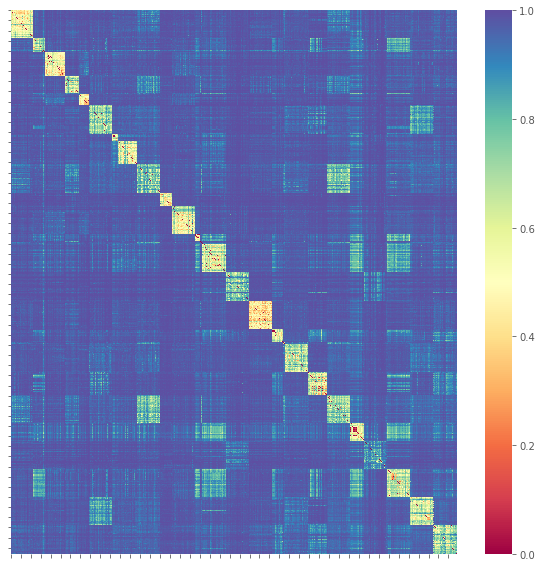

In [53]:
plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])


### FYI тоже самое в Gensim

In [ ]:
!pip install gensim

In [54]:
from gensim.corpora import *
texts = [df.text.iloc[i].split() for i in range(len(df))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [55]:
from gensim.models import  *
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [56]:
from gensim import similarities

index = similarities.MatrixSimilarity(corpus_tfidf)
sims = index[corpus_tfidf]

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[[], []]

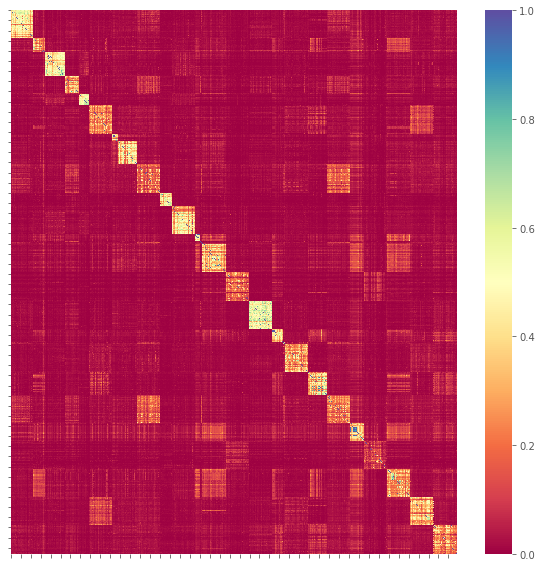

In [57]:
plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])


# LSA

C помощью `TruncatedSVD` выполните LSА преобразование документов

In [58]:
from sklearn.decomposition import TruncatedSVD

In [59]:
lsa = TruncatedSVD(n_components=10, random_state=123)
Z = lsa.fit_transform(X)

In [61]:
X.shape

(1930, 22682)

In [60]:
Z.shape

(1930, 10)

In [63]:
Z[:5]

array([[ 0.27023238,  0.21751668, -0.22001264,  0.57058929,  0.02433881,
         0.12529775,  0.39750075, -0.04368865, -0.01483101, -0.01305324],
       [ 0.21729854,  0.15669725, -0.16212232,  0.46968745,  0.05299648,
         0.13680389,  0.43929365, -0.04734148, -0.02188357,  0.0177938 ],
       [ 0.23308183,  0.19809765, -0.22876678,  0.50514468,  0.02302656,
         0.14026332,  0.37366452, -0.03226732, -0.00141582,  0.00135503],
       [ 0.20117535,  0.17689186, -0.21255297,  0.47497176,  0.0216103 ,
         0.11793275,  0.31021161, -0.0279934 , -0.03174782, -0.00141065],
       [ 0.14087496,  0.09726345, -0.09331527,  0.26933337,  0.03764432,
         0.08202004,  0.26601074, -0.03620149, -0.00955903,  0.01996755]])

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
enc = LabelEncoder()

In [68]:
df.loc[:, 'class'].value_counts()

Важные мировые события                           403
Внутренняя политика РФ                           364
Внутренняя политика РФ: оппозиция                277
Теракты                                          200
Международные отношения                          153
Спорт                                            102
Проишествия  РФ                                  100
Внутренняя политика: культура                    100
Спорт                                            100
Международные отношения: Криминальная хроника     82
Технологии                                        49
Name: class, dtype: int64

In [69]:
label = enc.fit_transform(df.loc[:, 'class'])

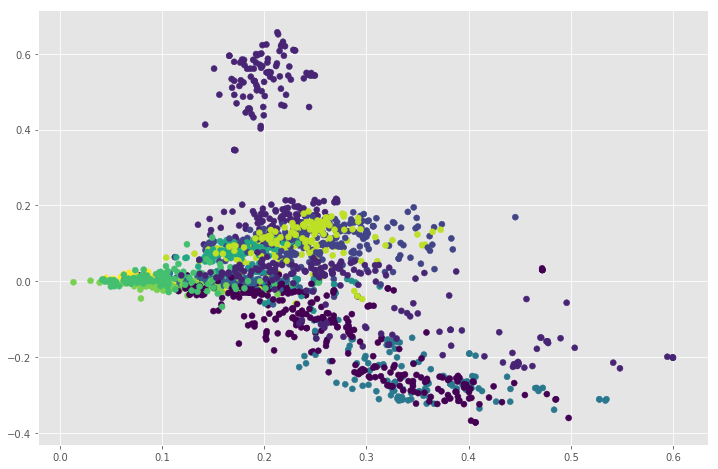

In [70]:
plt.scatter(Z[:,0], Z[:,1], c=label)

Так же посчитайте косинусное расстояние и визуализируйте его

In [71]:
sims = pairwise_distances(Z, metric='cosine')

In [72]:
sims.shape

(1930, 1930)

[[], []]

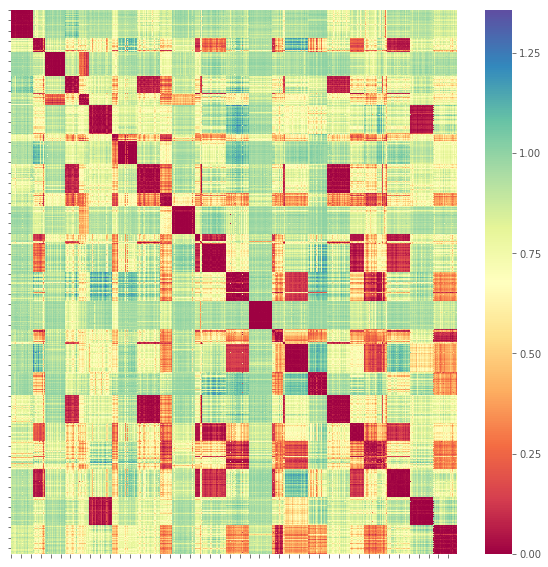

In [73]:
plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])


Составьте некоторый "поисковый запрос" и найдите наиболее подходящие документы из корпуса с помощью LSI

In [119]:
q = u'премьер министр великобритании'
q_norm = lemmatize(q)

In [120]:
q_norm

'премьер министр великобритания'

In [121]:
q_bow = vect.transform([q_norm])

In [122]:
q_lsa = lsa.transform(q_bow)

In [123]:
sims = pairwise_distances(Z, q_lsa, metric='cosine')

In [124]:
idx = np.argsort(sims, axis=0)[:,0]

In [125]:
df.iloc[idx, 0]

1296    москва июнь тереза мэй сформировывать новый пр...
1330    новость топ москва июнь великобритания опублик...
1358    рбк москва июнь великобритания опубликовывать ...
1294    глобальный конфликт москва июнь парламентский ...
1323    рбк москва июнь трамп выражать мэй поддержка с...
1300    москва июнь британский консерватор потерять бо...
1309    событие день москва июнь великобритания опубли...
1359    пульс планета москва июнь великобритания опубл...
1365    москва июнь окончательный итог выборы великобр...
1354    обзор москва июнь британия побеждать консерват...
1322    событие день москва июнь консервативный партия...
1347    рен тв москва июнь трамп удивлять результат вы...
1341    новость москва июнь великобритания подводить и...
1360    царьград тв москва июнь окончательный итог вел...
1291    советский россия москва июнь ночной кошмар тер...
1329    риа новость москва июнь трамп выражать поддерж...
1304    москва июнь консерватор побеждать выборы велик...
1286    ночной

### FYI тоже самое в Gensim